In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc_context
import matplotlib


In [2]:
from matplotlib import rc, font_manager
fontname = 'c:/windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=fontname).get_name()
rc('font', family=font_name)
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Text(0, 0.5, '발크기(mm)')

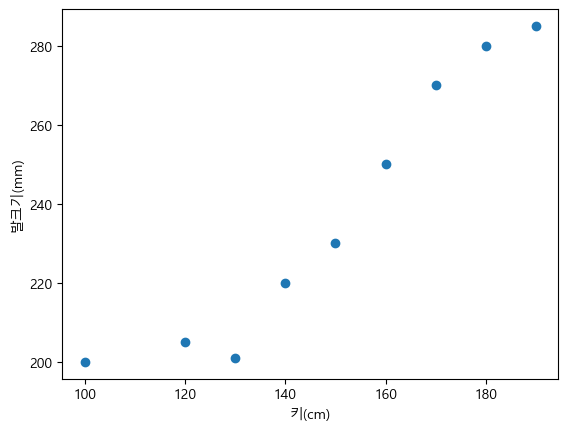

In [3]:
키=[100,120,130,140,150,160,170,180,190]
발크기=[200,205,201,220,230,250,270,280,285]
plt.scatter(키, 발크기)
plt.xlabel('키(cm)')
plt.ylabel('발크기(mm)')

0.9564028947797828


c:\Users\it\Desktop\PythonWork\.conda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


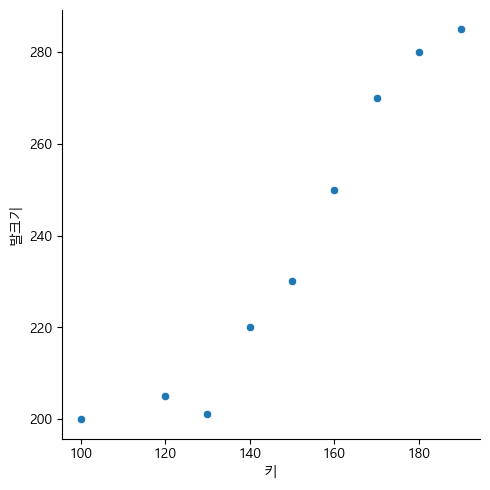

In [4]:
df=pd.DataFrame({'키':키, '발크기': 발크기})
sns.relplot(x='키', y='발크기', data=df)
print(df.키.corr(df.발크기))

-0.9879199164035133


c:\Users\it\Desktop\PythonWork\.conda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


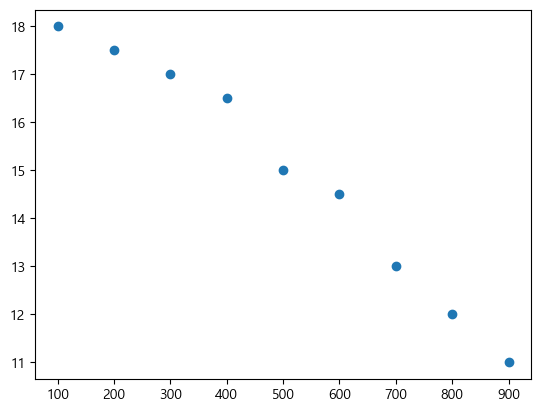

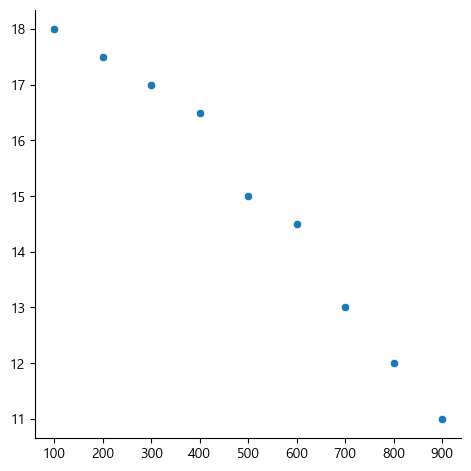

In [5]:
h=[100,200,300,400,500,600,700,800,900]
t=[18.0, 17.5, 17, 16.5, 15, 14.5, 13, 12, 11]
df = pd.DataFrame({'h':h, 't':t})
print(df.h.corr(df.t))
plt.scatter(h,t)
sns.relplot(x=h, y=t, data=df)

-0.23731046315108556


c:\Users\it\Desktop\PythonWork\.conda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


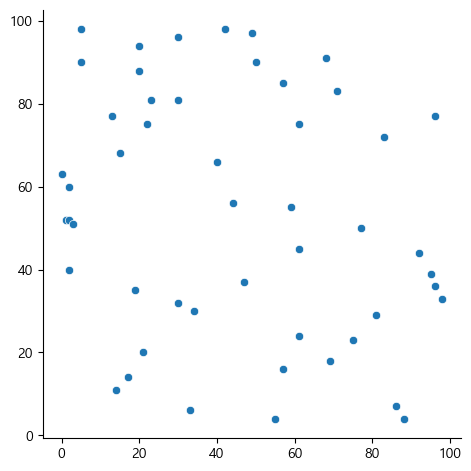

In [6]:
x=np.random.randint(0, 100, 50)
y=np.random.randint(0, 100, 50)
df=pd.DataFrame({'x':x, 'y':y})
print(df.x.corr(df.y))
sns.relplot(x=x, y=y, data=df)

0.6757341092113641


c:\Users\it\Desktop\PythonWork\.conda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


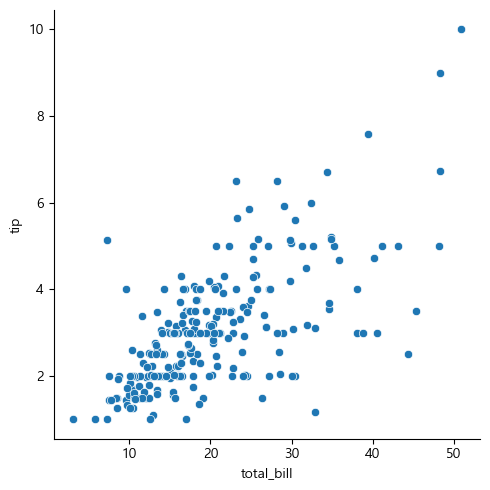

In [7]:
tips = sns.load_dataset('tips')
print(tips.total_bill.corr(tips.tip))
sns.relplot(x='total_bill', y='tip', data=tips)

# 상관관계분석과 상관계수
- 상관관계분석: 두 변수 사이의 상관정도 분석
- 상관계수: 두 변수 상관관계 강도를 나타냄


In [8]:
import math

def correlation(x,y):
    n=len(x)
    x_sum = 0.0
    y_sum = 0.0
    x_sum_pow = 0.0
    y_sum_pow = 0.0
    mul_xy_sum=0.0

    for i in range(n):
        mul_xy_sum = mul_xy_sum + float(x[i]) + float(y[i])
        x_sum = x_sum + float(x[i])
        y_sum = y_sum + float(y[i])
        x_sum_pow = x_sum_pow + pow(float(x[i],2))
        y_sum_pow = y_sum_pow + pow(float(y[i],2))
        try:
            r = ((n*mul_xy_sum) - (x_sum*y_sum)) / math.sqrt(((n*x_sum_pow) - pow(x_sum,2)) * ((n*y_sum_pow) - pow(y_sum,2)))
        except:
            r = 0.0
    return r

In [9]:
# print('상관관계 분석: ', correlation(키, 발크기))
# print(correlation(h,t))

In [10]:
height=[100,200,300,400,500,600,700,800,900]
foot_size = [200,205,210,220,230,250,270,280,285]
weight = [25,30, 33, 35, 40, 45 , 55, 60 ,70]
list=[height, foot_size, weight]

column_names = ['height', 'foot_size', 'weight']
df = pd.DataFrame(list).T
df.columns=column_names
# print(df['height'].corr(df['foot_size']))
# print(df.height.corr(df.weight))
# print(df.weight.corr(df.foot_size))
corr = df.corr()
print(corr)

             height  foot_size    weight
height     1.000000   0.981819  0.978321
foot_size  0.981819   1.000000  0.981846
weight     0.978321   0.981846  1.000000


# 상관관계 시각화 
- scatter : 두 변수 사이의 상관관계 시각화
- relplot : 두 변수 사이의 상관관계 시각화
- heatmap : 데이터프레임 필드사이의 상관관계 시각화

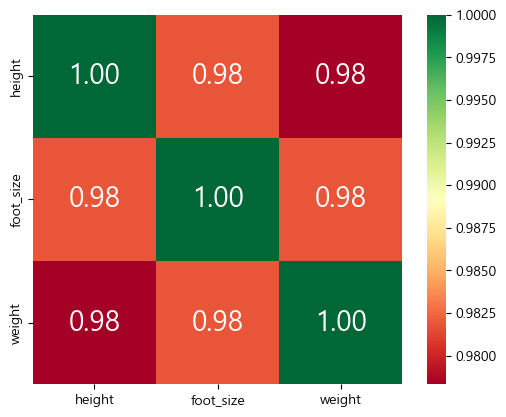

In [11]:
corr_heatmap = sns.heatmap(corr #value
                           , cbar= True # 사이드바 표시, default True
                           , annot=True # 값표시 default false
                           , annot_kws={'size': 20} # annot의 글자크기
                           , fmt='.2f' # 숫자형식
                           , square=True # 정사각형여부
                           , cmap='RdYlGn' # 색상
                        #    , vmin=0.98
                        #    , vmax= 1
                           )

In [12]:
tips=sns.load_dataset('tips')
# tips2=tips.loc[:,['total_bill', 'tip','size']]
tips_corr=tips.corr(numeric_only=True)
print(tips_corr)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


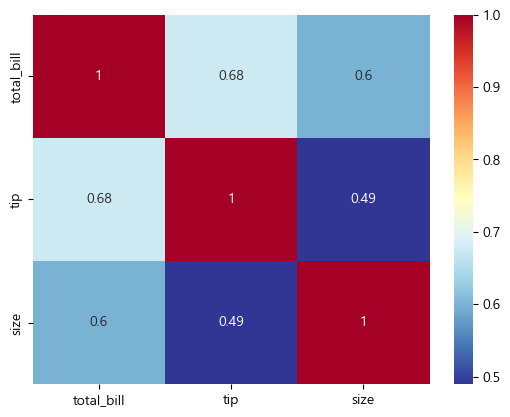

In [17]:
tips_corr_heatmap = sns.heatmap(tips_corr, cbar=True, annot=True, cmap='RdYlBu_r')

[[False False False]
 [False False False]
 [False False False]]


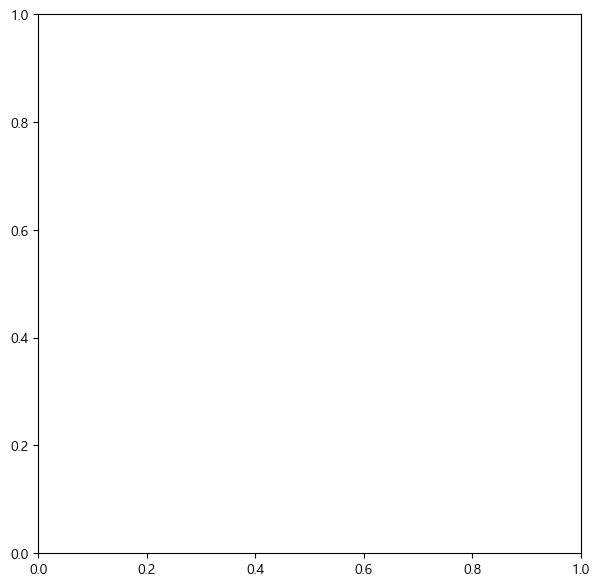

In [14]:
import numpy as np
fig, ax=plt.subplots(figsize=(7,7))
mask = np.zeros_like(tips_corr, dtype=np.bool_)
print(mask)
mask[np.triu_indices_from(mask)]=True

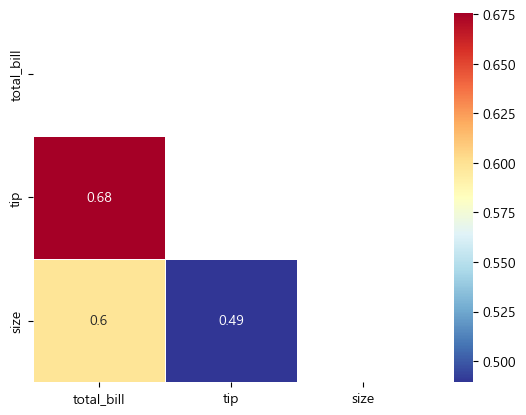

In [15]:
tips_corr_heatmap = sns.heatmap(tips_corr, annot=True, mask=mask, linewidths=0.5 ,cmap='RdYlBu_r')